In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from sklearn.metrics import pairwise_distances

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


from IPython.display import display, Image

In [2]:
fashion = pd.read_csv(r"F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\data\fashion.csv")

In [3]:
apparel_b = fashion[fashion["Gender"]=="Boys"]
apparel_g = fashion[fashion["Gender"]=="Girls"]
footwear_m = fashion[fashion["Gender"]=="Men"]
footwear_wo = fashion[fashion["Gender"]=="Women"]
#copy
apparel_boy = apparel_b.copy()
apparel_girls = apparel_g.copy()
footwear_men = footwear_m.copy()
footwear_women = footwear_wo.copy()

## PART I : FEATURE EXTRACTION

In [4]:
def extract_features(train_data_dir,name,train_numb):
    item = []
    datagen = ImageDataGenerator(rescale=1. / 255)
    model = ResNet50(include_top=False, weights='imagenet')
    generator = datagen.flow_from_directory(train_data_dir,target_size=(224, 224),batch_size=1,
                                            class_mode=None,shuffle=False)
    for i in generator.filenames:
        item.append(i.split('\\')[1].split('.')[0])
    extracted_features = model.predict_generator(generator, train_numb // 1)
    extracted_features = extracted_features.reshape((train_numb, 100352)) 
    return item,extracted_features

In [5]:
Men_ids, Men_features = extract_features(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\data\Footwear\Men\Images','Men',811)
Women_ids, Women_features = extract_features(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\data\Footwear\Women\Images','Women',769)
Boy_ids, Boy_features = extract_features(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\data\Apparel\Boys\Images','Boys',759)
Girl_ids, Girl_features = extract_features(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\data\Apparel\Girls\Images','Girls',567)

Found 811 images belonging to 1 classes.


C:\Users\WARINT~1.NAW\AppData\Local\Temp/ipykernel_2732/4181969245.py:9: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  extracted_features = model.predict_generator(generator, train_numb // 1)


Found 769 images belonging to 1 classes.
Found 759 images belonging to 1 classes.
Found 567 images belonging to 1 classes.


In [5]:
Men_ids = np.load(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\NPY File\Men_productId.npy')
Men_features = np.load(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\NPY File\Men_features.npy')
Women_ids = np.load(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\NPY File\Women_productId.npy')
Women_features = np.load(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\NPY File\Women_features.npy')
Boy_ids = np.load(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\NPY File\Boys_features.npy')
Boy_features = np.load(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\NPY File\Boys_productId.npy')
Girl_ids = np.load(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\NPY File\Girls_productId.npy')
Girl_features = np.load(r'F:\01_Dataset\01_Computer Vision\06 E-commerce Product Image\NPY File\Girls_features.npy')

In [9]:
def recommend_product(product_id):
    if fashion[fashion['ProductId'] == int(product_id)]['Gender'].values == 'Men':
        Productids = Men_ids
        extracted_features = Men_features
        df = footwear_men
    elif fashion[fashion['ProductId'] == int(product_id)]['Gender'].values == 'Women':
        Productids = Women_ids
        extracted_features = Women_features
        df = footwear_women
    elif fashion[fashion['ProductId'] == int(product_id)]['Gender'].values == 'Boys':
        Productids = Boy_ids
        extracted_features = Boy_features
        df = apparel_boy
    elif fashion[fashion['ProductId'] == int(product_id)]['Gender'].values == 'Girls':
        Productids = Girl_ids
        extracted_features = Girl_features
        df = apparel_girls
    
    doc_id = Productids.index(product_id)
    pairwise_dist = pairwise_distances(extracted_features, extracted_features[doc_id].reshape(1,-1))
    indices = np.argsort(pairwise_dist.flatten())[0:5]
    pdists  = np.sort(pairwise_dist.flatten())[0:5]

    list_A = ['Main Product','1#Recommend','2#Recommend','3#Recommend','4#Recommend','5#Recommend']
    plt.figure(figsize=(18,10))
    for i in range(5):
        recommend_df = df[['ImageURL','ProductTitle']].loc[df['ProductId']==int(Productids[indices[i]])]
        plt.subplot(1,5,i+1)
        plt.imshow(io.imread(recommend_df['ImageURL'].values[0]))
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(Productids[indices[i]] + " " + recommend_df['ProductTitle'].values[0][:27])
        plt.title(list_A[i])

## PART II : RECOMMENDATION

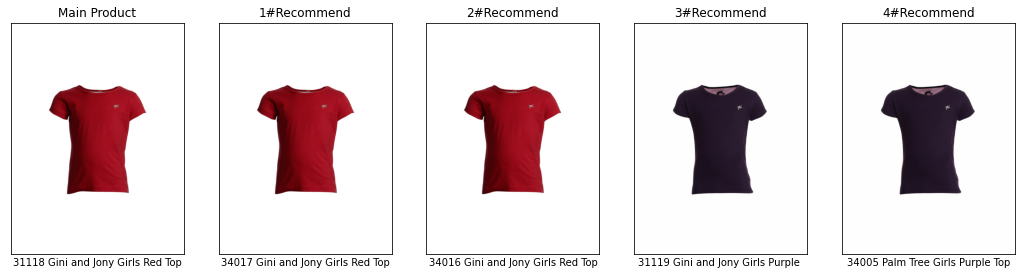

In [7]:
recommend_product('31118')

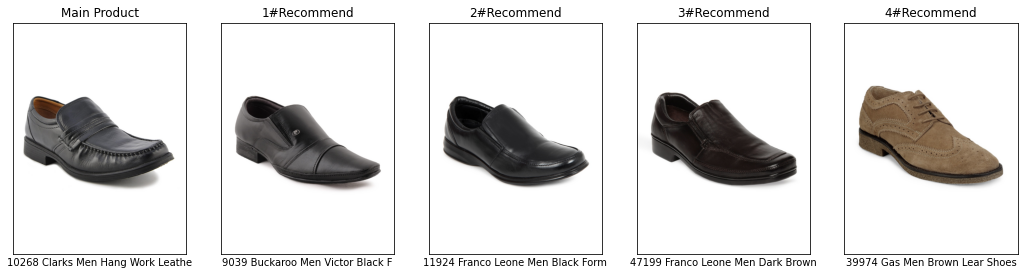

In [6]:
recommend_product('10268')

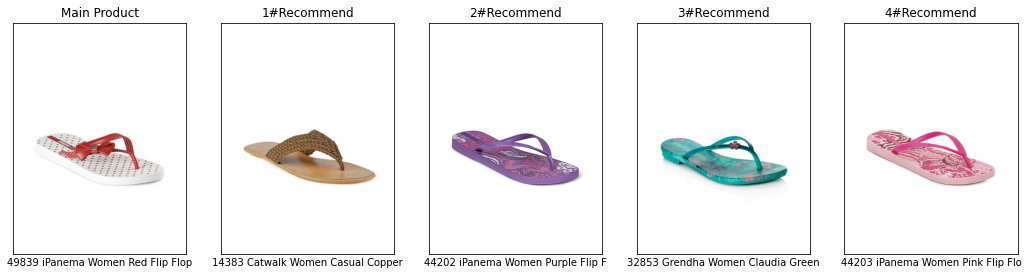

In [7]:
recommend_product('49839')

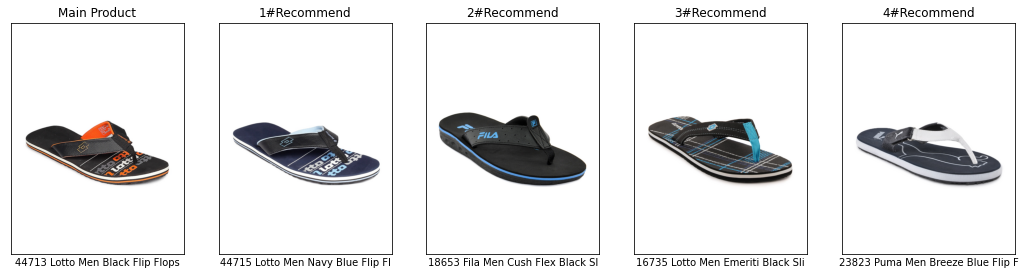

In [8]:
recommend_product('44713')

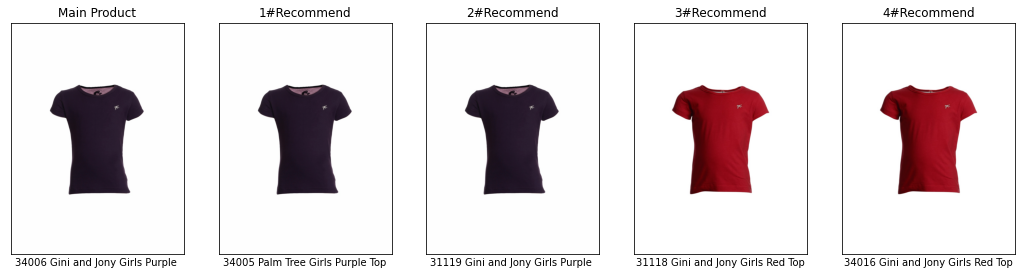

In [11]:
recommend_product('34006')

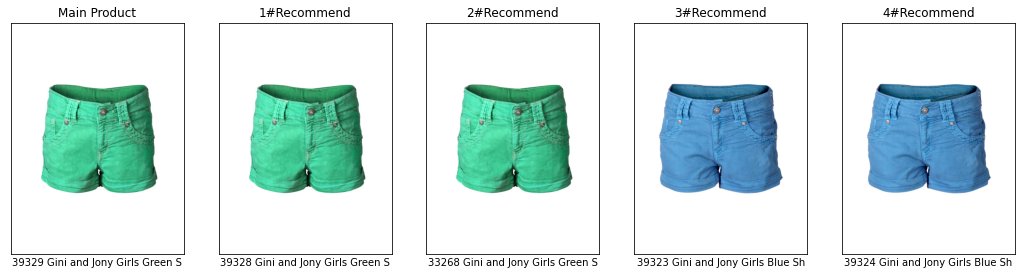

In [14]:
recommend_product('39329')

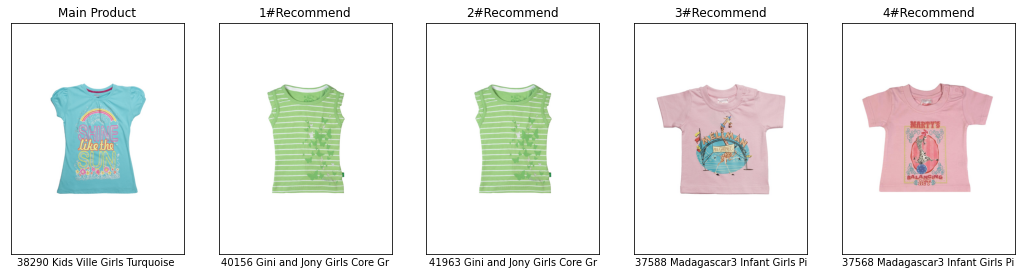

In [8]:
recommend_product('39390')